<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/k2_pix_small.png">
*This notebook contains an excerpt instructional material from [gully](https://twitter.com/gully_) and the [K2 Guest Observer Office](https://keplerscience.arc.nasa.gov/); the content is available [on GitHub](https://github.com/gully/goldenrod).*


<!--NAVIGATION-->
< [! wget -r https://archive.stsci.edu/pub/kepler/target_pixel_files/0031/003111451/](02.06-TPFs_of_supernovas_2011c.ipynb) | [Contents](Index.ipynb) | [goldenrod](03.01-Replicate-everest.ipynb) >

In this notebook we look at the TPF's of supernovas

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import sncosmo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Get the TPF's.  Search here:  
https://archive.stsci.edu/kepler/data_search/search.php

|Event|KIC ID|Link|
|--|--|--|
|KSN2012a|8957091|https://archive.stsci.edu/pub/kepler/target_pixel_files/0089/008957091/ |
|KSN2011b|3111451|https://archive.stsci.edu/pub/kepler/target_pixel_files/0031/003111451/ |  
|KSN2011c|7889229|https://archive.stsci.edu/pub/kepler/target_pixel_files/0078/007889229/|

In [3]:
#! wget -r https://archive.stsci.edu/pub/kepler/target_pixel_files/0031/003111451/

In [4]:
ls -d ../data/KSN20*

../data/KSN2011b/ ../data/KSN2011c/ ../data/KSN2012a/


In [5]:
from astropy.io import fits

In [6]:
hdu_all = fits.open('../data/KSN2012a/kplr008957091-2011271113734_lpd-targ.fits.gz')

In [7]:
hdu_all.info()

Filename: ../data/KSN2012a/kplr008957091-2011271113734_lpd-targ.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  TARGETTABLES    1 BinTableHDU    287   4573R x 13C   [D, E, J, 64J, 64E, 64E, 64E, 64E, 64E, J, E, E, 40E]   
  2  APERTURE      1 ImageHDU        48   (8, 8)   int32   


In [8]:
dat = hdu_all[1].data

In [9]:
JD_like = dat['TIME'] + 2454833.0
MJD = JD_like - 2400000.5
MJD

array([ 55739.34580222,  55739.36623655,  55739.38667079, ...,
        55832.72778872,  55832.74822181,  55832.7686548 ])

In [10]:
dat.columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '64J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(8,8)'
    name = 'FLUX'; format = '64E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(8,8)'
    name = 'FLUX_ERR'; format = '64E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(8,8)'
    name = 'FLUX_BKG'; format = '64E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(8,8)'
    name = 'FLUX_BKG_ERR'; format = '64E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(8,8)'
    name = 'COSMIC_RAYS'; format = '64E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(8,8)'
    name = 'QUALITY'; format = 'J'; disp = 'B24.24'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'RB_LEVEL'; format = '40E'; unit = 'sigma'; disp = 'E14.7'; dim = '(5,8)'
)

In [11]:
dat['FLUX'].shape

(4573, 8, 8)

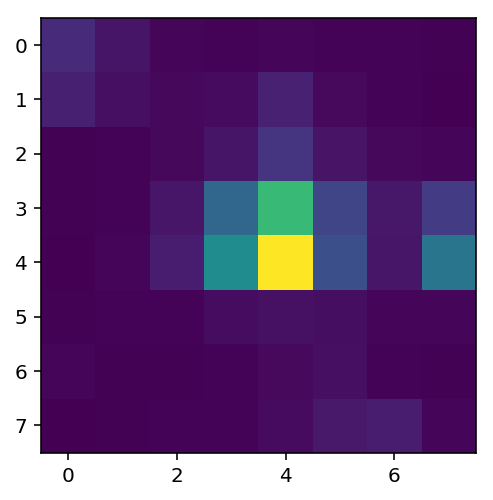

In [12]:
plt.imshow(dat['FLUX'][100, :,:]);

In [13]:
KEGS_header = pd.read_csv('../data/KSN-2012a_raw_data.dat', skiprows=11, sep=r'\s{2,}', nrows=0, engine='python')
names = KEGS_header.columns.str.strip('#').str.replace(' ', '').str.replace('-', '_')
ksn2011c = pd.read_csv('../data/KSN-2012a_raw_data.dat', comment='#', names=names, delim_whitespace=True)
ksn2011c.head()

,KJD,KJD_T_EXP,KJD_T_MAX,LC_val_BCK,LC_err
0,1297.12725,-29.99035,-47.03875,0.01411,0.02101
1,1297.14768,-29.96992,-47.01832,-0.02394,0.02735
2,1297.16812,-29.94948,-46.99788,0.00374,0.02127
3,1297.18855,-29.92905,-46.97745,-0.03808,0.02246
4,1297.20898,-29.90862,-46.95702,-0.00180,0.02095


In [14]:
x = ksn2011c.KJD.values
yerr = x*0.0+0.01
y = ksn2011c.LC_val_BCK.values

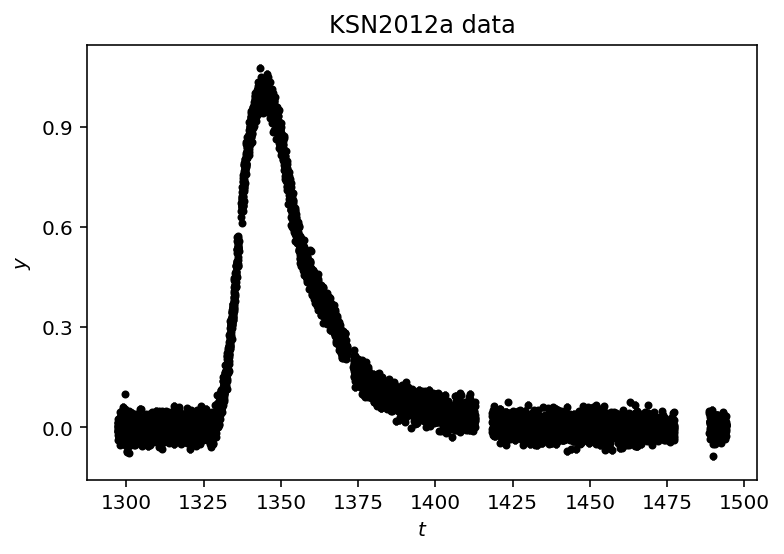

In [16]:
# Plot the data
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.ylabel(r"$y$")
plt.xlabel(r"$t$")
#plt.xlim(-5, 5)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(5))
plt.title("KSN2012a data");

Read in the Kepler lightcurve.

In [17]:
import os

In [19]:
fn_Series = pd.Series(data=os.listdir('../data/KSN2012a/'))

In [20]:
fns = fn_Series[fn_Series.str.contains('_llc.')].values
fns_tpfs = fn_Series[fn_Series.str.contains('lpd-targ.fits')].values

In [21]:
fn =fns_tpfs[0]

In [23]:
hdu = fits.open('../data/KSN2012a/'+fn)

In [24]:
hdu.info()

Filename: ../data/KSN2012a/kplr008957091-2011271113734_lpd-targ.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  TARGETTABLES    1 BinTableHDU    287   4573R x 13C   [D, E, J, 64J, 64E, 64E, 64E, 64E, 64E, J, E, E, 40E]   
  2  APERTURE      1 ImageHDU        48   (8, 8)   int32   


In [25]:
hdu[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '64J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(8,8)'
    name = 'FLUX'; format = '64E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(8,8)'
    name = 'FLUX_ERR'; format = '64E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(8,8)'
    name = 'FLUX_BKG'; format = '64E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(8,8)'
    name = 'FLUX_BKG_ERR'; format = '64E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(8,8)'
    name = 'COSMIC_RAYS'; format = '64E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(8,8)'
    name = 'QUALITY'; format = 'J'; disp = 'B24.24'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'RB_LEVEL'; format = '40E'; unit = 'sigma'; disp = 'E14.7'; dim = '(5,8)'
)

In [26]:
hdu.close()

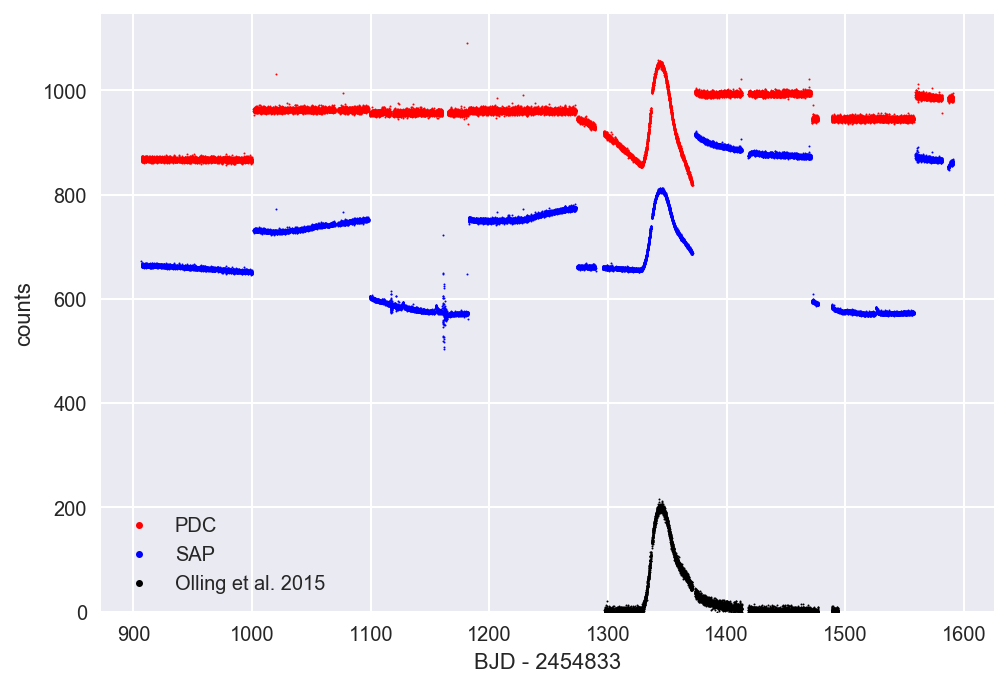

In [57]:
hdu = fits.open('../data/KSN2012a/'+fns[0])
plt.plot(hdu[1].data['TIME'], hdu[1].data['PDCSAP_FLUX']*0-10, 'r.', label = 'PDC')
plt.plot(hdu[1].data['TIME'], hdu[1].data['PDCSAP_FLUX']*0-10, 'b.', label = 'SAP')
plt.plot(hdu[1].data['TIME'], hdu[1].data['PDCSAP_FLUX']*0-10, 'k.', label='Olling et al. 2015')

for i, fn in enumerate(fns):
    hdu = fits.open('../data/KSN2012a/'+fn)
    plt.plot(hdu[1].data['TIME'], hdu[1].data['PDCSAP_FLUX'], 'r.', ms=2)
    plt.plot(hdu[1].data['TIME'], hdu[1].data['SAP_FLUX'], 'b.', ms=2)
    hdu.close()

plt.plot(x, y*200.0, "k.", ms=2)
plt.ylim(0)
plt.xlabel('BJD - 2454833')
plt.ylabel('counts')
plt.legend(loc='best')
plt.savefig('../results/KSN2012a_demo.png', dpi=300, bbox_inches='tight');

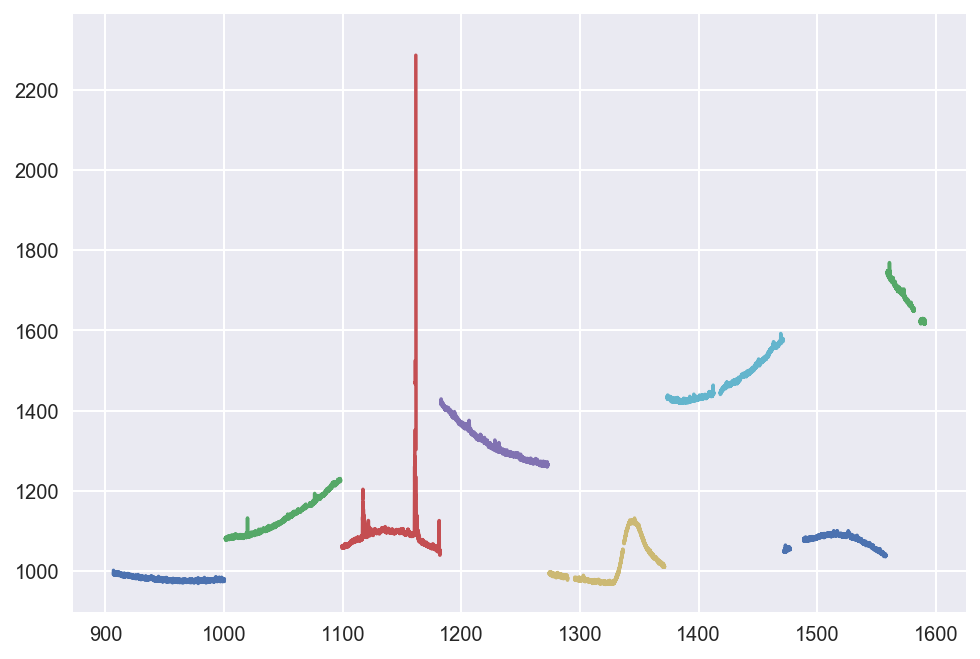

In [60]:
for i, fn in enumerate(fns):
    hdu = fits.open('../data/KSN2012a/'+fn)
    #plt.plot(hdu[1].data['TIME'], hdu[1].data['PDCSAP_FLUX'])
    plt.plot(hdu[1].data['TIME'], hdu[1].data['SAP_FLUX']+hdu[1].data['SAP_BKG'])
    hdu.close()

#plt.plot(x, 2200.0+y*500.0, "-k")
#plt.ylim(2000, 2800)
#plt.xlim(800, 1200)

## Sum all TPFs

In [29]:
import seaborn as sns

In [30]:
sns.set_context('notebook')

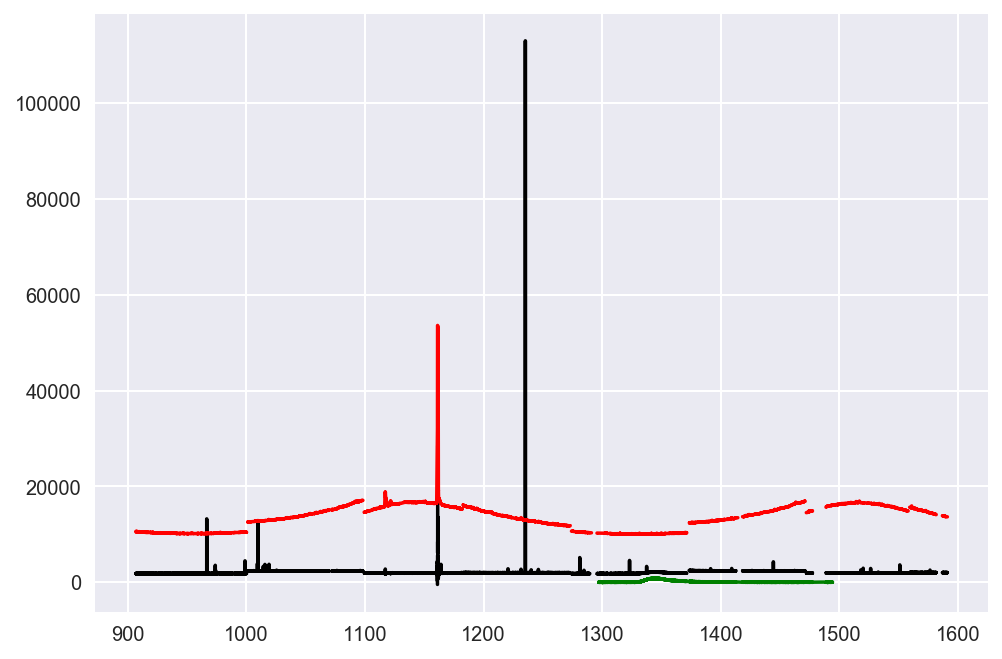

In [31]:
for i, fn in enumerate(fns_tpfs):
    hdu = fits.open('../data/KSN2012a/'+fn)
    #plt.plot(hdu[1].data['TIME'], hdu[1].data['PDCSAP_FLUX'])
    cr = hdu[1].data['COSMIC_RAYS']
    #gi = cr != cr
    flux = (hdu[1].data['FLUX']).sum(2).sum(1)
    bkg = (hdu[1].data['FLUX_BKG']).sum(2).sum(1)
    plt.plot(hdu[1].data['TIME'], flux, 'k')
    plt.plot(hdu[1].data['TIME'], bkg, 'r')
    hdu.close()

plt.plot(x, y*800.0, "-g")
#plt.ylim(0, 30000)  

In [32]:
np.unique(cr)

array([ 3.43490005,  3.77038097,  3.83351541, ...,         nan,
               nan,         nan], dtype=float32)

<!--NAVIGATION-->
< [! wget -r https://archive.stsci.edu/pub/kepler/target_pixel_files/0031/003111451/](02.06-TPFs_of_supernovas_2011c.ipynb) | [Contents](Index.ipynb) | [goldenrod](03.01-Replicate-everest.ipynb) >